In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


pd.options.display.float_format = '{:.5f}'.format  #결과에 지수를 실수로 보이게끔


# matplotlib에서 한글 깨짐 문제 발생
# 한글 폰트 사용을 위해서 폰트 설치
# 참고 - https://www.whatwant.com/entry/matplotlib-hangul-colab-local
# 실행 후 런타임 다시 시작해야 함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


#설치한 폰트 사용
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [23]:
data = pd.read_excel('세대별대출분석.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
data.isnull().sum()

월             0
영유아(0~5)      0
유아(6~7)       0
초등(8~13)      0
청소년(14~19)    0
20대           0
30대           0
40대           0
50대           0
60대 이상        0
dtype: int64

In [19]:
data[['월','초등(8~13)']].sort_values('초등(8~13)', ascending=False)

,월,초등(8~13)
108,2022-01,2197574
103,2021-08,2089561
102,2021-07,2075255
120,2023-01,2045150
72,2019-01,2007969
...,...,...
127,2023-08,893446
89,2020-06,791981
92,2020-09,578957
87,2020-04,377632


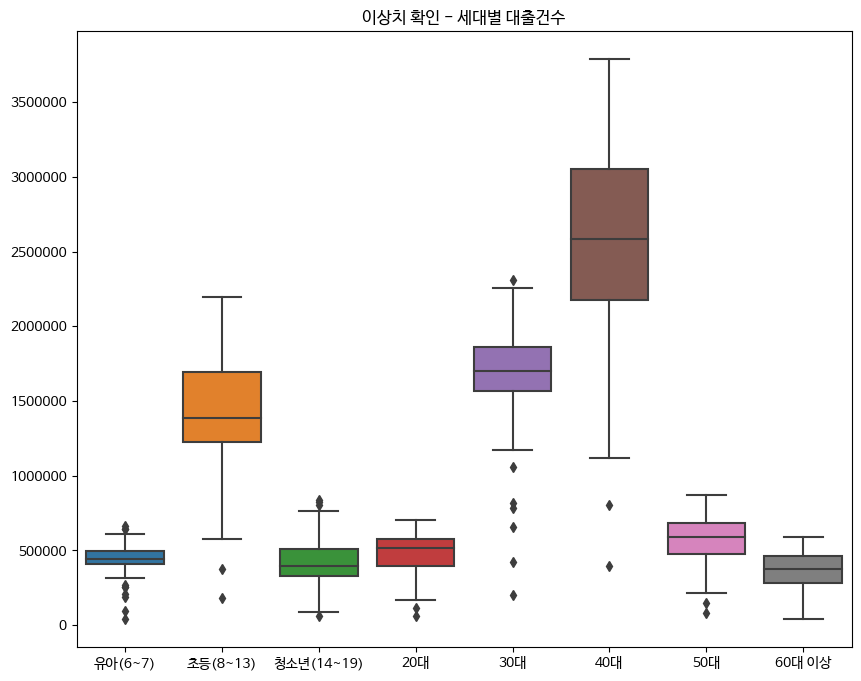

In [21]:
#상자그림 그리기
plt.figure(figsize=(10,8))
tmp = data.iloc[:,2:]


plt.ticklabel_format(style='plain', axis='y')
plt.title("이상치 확인 - 세대별 대출건수")


sns.boxplot(tmp)
plt.show()

In [22]:
#2013-01 ~ 2023-08-14 까지의 데이터
data = pd.read_excel('세대별대출분석.xlsx')

#2023-08은 아직 한달이 다 안지났으니 분석에서 제외
data = data[data['월'] != '2023-08']

data = data.sort_values('월', ascending=False).reset_index(drop=True)
data['연도월'] = pd.to_datetime(data['월'])
data['연'] = data['연도월'].dt.year
data['월'] = data['연도월'].dt.month
data['합계'] = data.iloc[:,3:].sum(axis=1)

tmp = ['연도월', '연', '월', '합계', '영유아(0~5)',	'유아(6~7)', '초등(8~13)', '청소년(14~19)', '20대', '30대', '40대', '50대', '60대 이상']
data = data[tmp]
data.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
<ipython-input-22-ab201d33db53>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['합계'] = data.iloc[:,3:].sum(axis=1)


,연도월,연,월,합계,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
0,2023-07-01,2023,7,9405031,295324,542519,1837488,390891,431900,1682029,3628659,852167,579874
1,2023-06-01,2023,6,7967816,265457,458918,1501420,251124,382654,1467065,3091590,758017,513923
2,2023-05-01,2023,5,7835440,247316,432065,1443020,307489,362670,1404430,3019349,777655,518804
3,2023-04-01,2023,4,8642808,263716,480490,1700830,269481,378606,1540072,3386769,824670,540357
4,2023-03-01,2023,3,8920657,259816,475894,1734277,305337,397790,1582615,3481264,842884,574467


In [ ]:
data.shape

(127, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   연도월         127 non-null    datetime64[ns]
 1   연           127 non-null    int64         
 2   월           127 non-null    int64         
 3   합계          127 non-null    int64         
 4   영유아(0~5)    127 non-null    int64         
 5   유아(6~7)     127 non-null    int64         
 6   초등(8~13)    127 non-null    int64         
 7   청소년(14~19)  127 non-null    int64         
 8   20대         127 non-null    int64         
 9   30대         127 non-null    int64         
 10  40대         127 non-null    int64         
 11  50대         127 non-null    int64         
 12  60대 이상      127 non-null    int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 13.0 KB


In [ ]:
data.describe()

,연,월,합계,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
count,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000
mean,2017.80315,6.36220,7582344.61417,305808.82677,444018.40157,1442924.30709,423590.60630,492600.50394,1690361.40945,2579929.46457,579094.06299,371826.45669
std,3.07328,3.44957,1471494.71329,68110.99996,93488.47218,334636.13114,149244.03879,116682.67709,309401.66236,630154.29018,145230.24055,111631.70911
min,2013.00000,1.00000,1026365.00000,23911.00000,39606.00000,184596.00000,58496.00000,61230.00000,201352.00000,395885.00000,81178.00000,41608.00000
25%,2015.00000,3.00000,6766149.00000,269310.00000,406384.00000,1228976.50000,330158.50000,403639.00000,1570573.00000,2184138.50000,480155.50000,285692.50000
50%,2018.00000,6.00000,7819020.00000,313696.00000,441345.00000,1394626.00000,395258.00000,514945.00000,1700550.00000,2587969.00000,589290.00000,379557.00000
75%,2020.00000,9.00000,8422832.00000,352720.00000,494287.00000,1696098.00000,509646.50000,579569.50000,1861523.00000,3054008.00000,684562.50000,461098.50000
max,2023.00000,12.00000,10422604.00000,451535.00000,660816.00000,2197574.00000,840170.00000,704374.00000,2309395.00000,3787137.00000,868545.00000,592792.00000


### 세대별 대출건수 시각화

Text(0.5, 1.0, '월별 대출건수 변화')

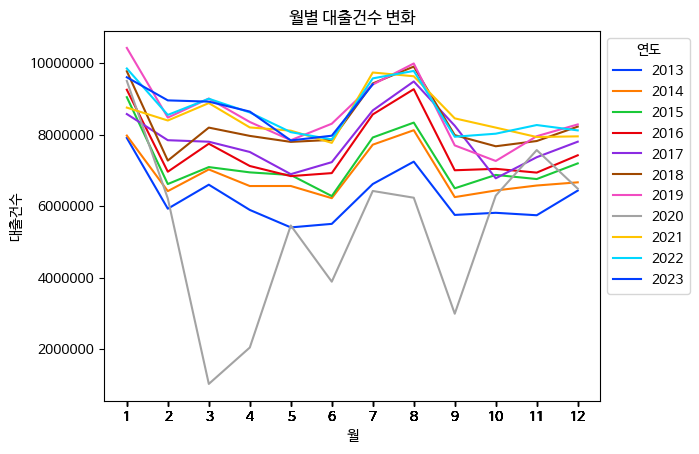

In [ ]:
sns.lineplot(data=data, x='월', y = '합계', hue='연', palette='bright')
plt.xticks(data['월'])
plt.ylabel('대출건수')

plt.legend(bbox_to_anchor = (1,1), title="연도") #범례 밖에 표시되게 설정
#y축의 값에 지수를 실수로 보이게끔
plt.ticklabel_format(style='plain', axis='y')

plt.title('월별 대출건수 변화')

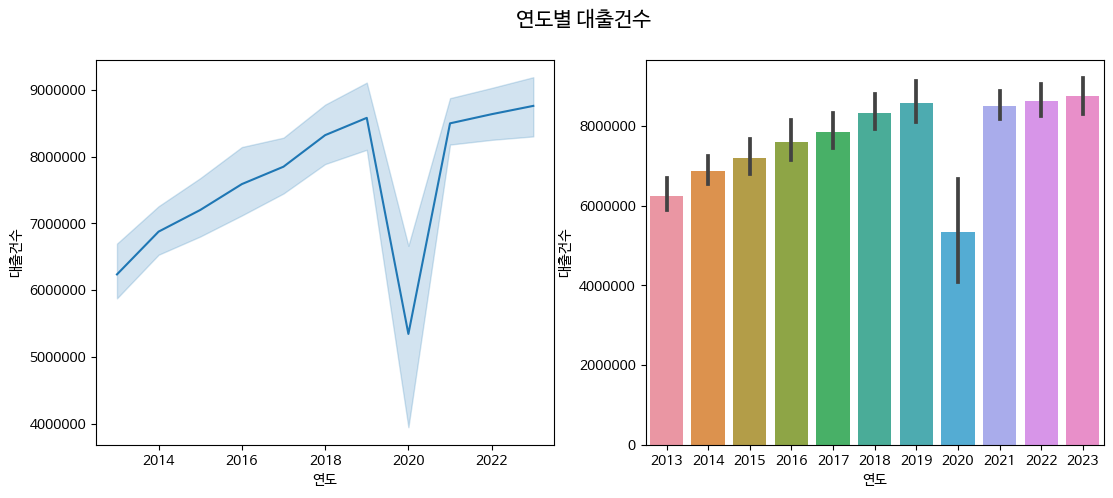

In [ ]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(13, 5)

sns.lineplot(data=data, x='연', y = '합계', ax=ax[0])
sns.barplot(data=data, x='연', y = '합계', ax=ax[1])

ax[0].set_xlabel('연도')
ax[1].set_xlabel('연도')
ax[0].set_ylabel('대출건수')
ax[1].set_ylabel('대출건수')

#y축의 값에 지수를 실수로 보이게끔
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].ticklabel_format(style='plain', axis='y')

plt.suptitle('연도별 대출건수', fontsize = 15)

plt.show()

In [ ]:
# 시각화 하기 위해 데이터 만드는중

tmp = data.groupby('연').mean().iloc[:,1:]
tmp = tmp.reset_index()
tmp.head(3)

<ipython-input-8-bdae07924f34>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby('연').mean().iloc[:,1:]


,연,합계,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
0,2013,6235467.91667,345532.91667,418241.41667,1230893.83333,460660.75000,575564.00000,1567289.75000,1791010.91667,394842.00000,213193.66667
1,2014,6876598.25000,355622.75000,458414.58333,1312080.25000,485852.41667,601818.75000,1682244.66667,2060952.58333,469059.00000,262576.58333
2,2015,7200861.25000,339661.50000,418634.25000,1341239.66667,497319.91667,597668.75000,1726586.50000,2239509.75000,497977.66667,298544.00000


In [ ]:
tmp.columns[1:]

Index(['합계', '영유아(0~5)', '유아(6~7)', '초등(8~13)', '청소년(14~19)', '20대', '30대',
       '40대', '50대', '60대 이상'],
      dtype='object')

In [ ]:
data1 = pd.melt(tmp, id_vars=['연'], value_vars=tmp.columns[1:])

In [ ]:
data1.head()

,연,variable,value
0,2013,합계,6235467.91667
1,2014,합계,6876598.25000
2,2015,합계,7200861.25000
3,2016,합계,7589007.66667
4,2017,합계,7849843.66667


In [ ]:
print(len(data1))
not_sum_data1 = data1[data1['variable'] != '합계']

110


In [ ]:
data

,연도월,연,월,합계,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
0,2023-07-01,2023,7,9405031,295324,542519,1837488,390891,431900,1682029,3628659,852167,579874
1,2023-06-01,2023,6,7967816,265457,458918,1501420,251124,382654,1467065,3091590,758017,513923
2,2023-05-01,2023,5,7835440,247316,432065,1443020,307489,362670,1404430,3019349,777655,518804
3,2023-04-01,2023,4,8642808,263716,480490,1700830,269481,378606,1540072,3386769,824670,540357
4,2023-03-01,2023,3,8920657,259816,475894,1734277,305337,397790,1582615,3481264,842884,574467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2013-05-01,2013,5,5403353,289157,358086,994972,360298,496881,1402621,1589619,363065,193884
123,2013-04-01,2013,4,5892007,325880,415621,1138084,311233,532388,1571194,1738171,390536,208388
124,2013-03-01,2013,3,6597794,327166,428211,1349098,430425,552441,1650861,1965168,424935,222853
125,2013-02-01,2013,2,5926539,255645,335425,1225038,530587,541512,1344531,1690606,387854,204398


In [ ]:
data3 = pd.melt(data, id_vars=['연','월'], value_vars=data.columns[3:])

In [ ]:
data3.columns

Index(['연', '월', 'variable', 'value'], dtype='object')

In [ ]:
not_sum_data3 = data3[data3['variable'] != '합계']

In [ ]:
tmp = data1[data1['variable']!='합계']
age_mean_data1 = tmp.groupby('variable').mean()
age_mean_data1 = age_mean_data1.reset_index()

In [ ]:
age_mean_data1

,variable,연,value
0,20대,2018.00000,489145.03571
1,30대,2018.00000,1684146.36688
2,40대,2018.00000,2610628.00758
3,50대,2018.00000,588273.29762
4,60대 이상,2018.00000,378780.40043
5,영유아(0~5),2018.00000,303993.69264
6,유아(6~7),2018.00000,444744.66342
7,청소년(14~19),2018.00000,420069.16017
8,초등(8~13),2018.00000,1453944.27381


In [ ]:
#행 순서를 나이 순으로 변경함
age_mean_data1 = age_mean_data1.reindex([5, 6, 8, 7, 0, 1, 2, 3, 4])

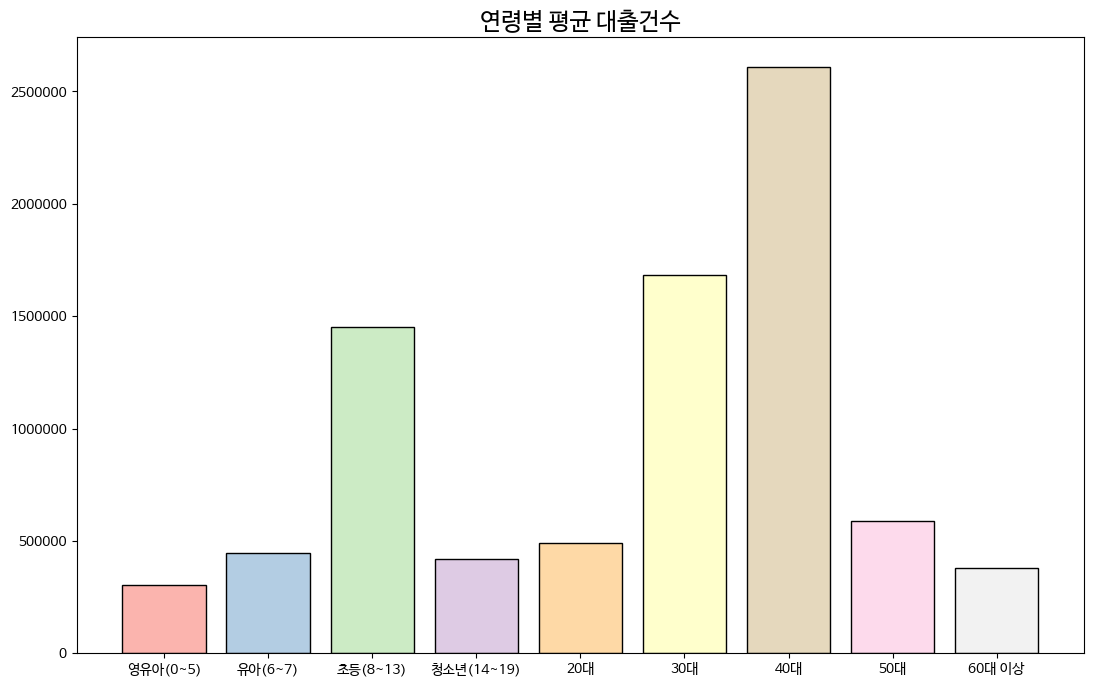

In [ ]:
plt.figure(figsize=(13,8))


# sns.barplot(data=not_sum_data1, x='연', y = 'value', hue='variable')

#sns.barplot(data=age_mean_data1, x= 'variable', y='value', hue = 'variable')
x = age_mean_data1['variable']
y = age_mean_data1['value']


colors = sns.color_palette('Pastel1',len(x))


plt.bar(x,y, color=colors, edgecolor='black')

plt.title('연령대별 평균 대출건수', fontsize=17)


#y축의 값에 지수를 실수로 보이게끔
plt.ticklabel_format(style='plain', axis='y')

plt.show()

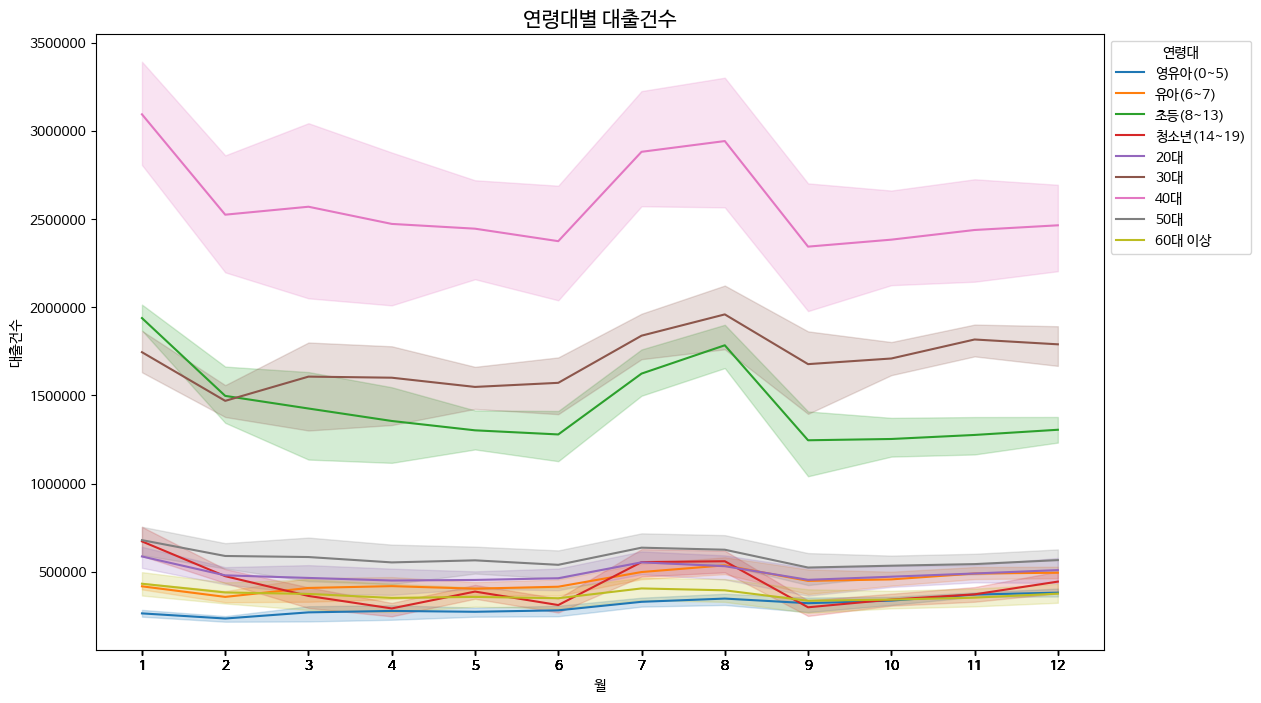

In [ ]:
plt.figure(figsize=(13,8))

#rocket_r, Set2
# , palette='Spectral'
sns.lineplot(data=not_sum_data3, x='월', y = 'value', hue='variable')
plt.xticks(data['월'])
plt.ylabel('대출건수')

plt.title('연령대별 대출건수', fontsize=15)

plt.legend(bbox_to_anchor = (1,1), title="연령대") #범례 밖에 표시되게 설정
#y축의 값에 지수를 실수로 보이게끔
plt.ticklabel_format(style='plain', axis='y')



In [ ]:
#2013-01 ~ 2023-08-15 까지의 데이터
data = pd.read_excel('세대별대출분석.xlsx')

#2023-08은 아직 한달이 다 안지났으니 분석에서 제외
data = data[data['월'] != '2023-08']

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
data.describe()

,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
count,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000,127.00000
mean,305808.82677,444018.40157,1442924.30709,423590.60630,492600.50394,1690361.40945,2579929.46457,579094.06299,371826.45669
std,68110.99996,93488.47218,334636.13114,149244.03879,116682.67709,309401.66236,630154.29018,145230.24055,111631.70911
min,23911.00000,39606.00000,184596.00000,58496.00000,61230.00000,201352.00000,395885.00000,81178.00000,41608.00000
25%,269310.00000,406384.00000,1228976.50000,330158.50000,403639.00000,1570573.00000,2184138.50000,480155.50000,285692.50000
50%,313696.00000,441345.00000,1394626.00000,395258.00000,514945.00000,1700550.00000,2587969.00000,589290.00000,379557.00000
75%,352720.00000,494287.00000,1696098.00000,509646.50000,579569.50000,1861523.00000,3054008.00000,684562.50000,461098.50000
max,451535.00000,660816.00000,2197574.00000,840170.00000,704374.00000,2309395.00000,3787137.00000,868545.00000,592792.00000


### 세대별 대출건수가 많은 분야 시각화

In [25]:
#분야, 세대별 대출건수 데이터 불러오기

#2021-01 ~ 2023-08-14 까지의 데이터
data1 = pd.read_excel('분야별/기술과학.xlsx')
data2 = pd.read_excel('분야별/문학.xlsx')
data3 = pd.read_excel('분야별/사회과학.xlsx')
data4 = pd.read_excel('분야별/언어.xlsx')
data5 = pd.read_excel('분야별/역사.xlsx')
data6 = pd.read_excel('분야별/예술.xlsx')
data7 = pd.read_excel('분야별/자연과학.xlsx')
data8 = pd.read_excel('분야별/종교.xlsx')
data9 = pd.read_excel('분야별/철학.xlsx')
data10 = pd.read_excel('분야별/총류.xlsx')

data1['분야'] = '기술과학'
data2['분야'] = '문학'
data3['분야'] = '사회과학'
data4['분야'] = '언어'
data5['분야'] = '역사'
data6['분야'] = '예술'
data7['분야'] = '자연과학'
data8['분야'] = '종교'
data9['분야'] = '철학'
data10['분야'] = '총류'

tmp_list = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]
data = pd.concat(tmp_list, ignore_index=True)

#2023-08은 아직 한달이 다 안지났으니 분석에서 제외
data = data[data['월'] != '2023-08']

data = data.sort_values('월', ascending=False).reset_index(drop=True)

data.insert(1, '연도월', pd.to_datetime(data['월']))
data.insert(1, '연', data['연도월'].dt.year)
data['월'] = data['연도월'].dt.month




data.head(3)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

,월,연,연도월,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상,분야
0,7,2023,2023-07-01,4574,9918,47136,11066,17564,41418,99483,28336,13460,총류
1,7,2023,2023-07-01,30777,63047,231007,41680,14745,156670,360641,43838,25257,자연과학
2,7,2023,2023-07-01,38676,41519,117241,46442,79964,243352,406862,140657,67060,사회과학


In [15]:
data[['월','연','초등(8~13)']].sort_values('초등(8~13)', ascending=False)

,월,연,초등(8~13)
183,1,2022,1143509
238,8,2021,1087429
63,1,2023,1051683
111,8,2022,1027027
122,7,2022,982989
...,...,...,...
77,12,2022,19975
215,10,2021,19896
100,9,2022,19851
209,11,2021,17946


In [14]:
data[['월','연','30대']].sort_values('30대', ascending=False)

,월,연,30대
238,8,2021,954759
111,8,2022,905641
225,9,2021,878508
122,7,2022,862461
219,10,2021,858089
...,...,...,...
20,5,2023,17807
141,5,2022,17742
156,4,2022,17710
189,1,2022,17628


In [10]:
data[['월','연','40대']].sort_values('40대', ascending=False)

,월,연,40대
183,1,2022,1860314
111,8,2022,1836965
238,8,2021,1789871
122,7,2022,1776677
63,1,2023,1776584
...,...,...,...
100,9,2022,39402
130,6,2022,39198
215,10,2021,37866
209,11,2021,36538


In [4]:
tmp.describe()

,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
count,240.00000,240.00000,240.00000,240.00000,240.00000,240.00000,240.00000,240.00000,240.00000
mean,30153.44167,52219.14583,167235.09167,32085.48750,38730.61667,159981.24583,321378.51250,71559.87917,49390.79583
std,51042.59698,86347.41361,251054.58295,43765.20423,48690.25873,219272.97171,440130.81572,84780.95841,69242.65349
min,1705.00000,4719.00000,17611.00000,2268.00000,4248.00000,16480.00000,35749.00000,13703.00000,10342.00000
25%,4570.00000,8542.25000,33962.75000,10232.00000,13849.50000,42761.75000,92506.50000,25448.75000,15601.75000
50%,9435.50000,20031.50000,81074.50000,16826.50000,17581.00000,84170.50000,172527.50000,40199.50000,25053.50000
75%,29853.75000,45299.25000,150797.75000,31367.50000,30584.25000,146727.00000,306564.00000,59442.50000,38393.00000
max,229267.00000,371489.00000,1143509.00000,247388.00000,204072.00000,954759.00000,1860314.00000,359203.00000,285064.00000


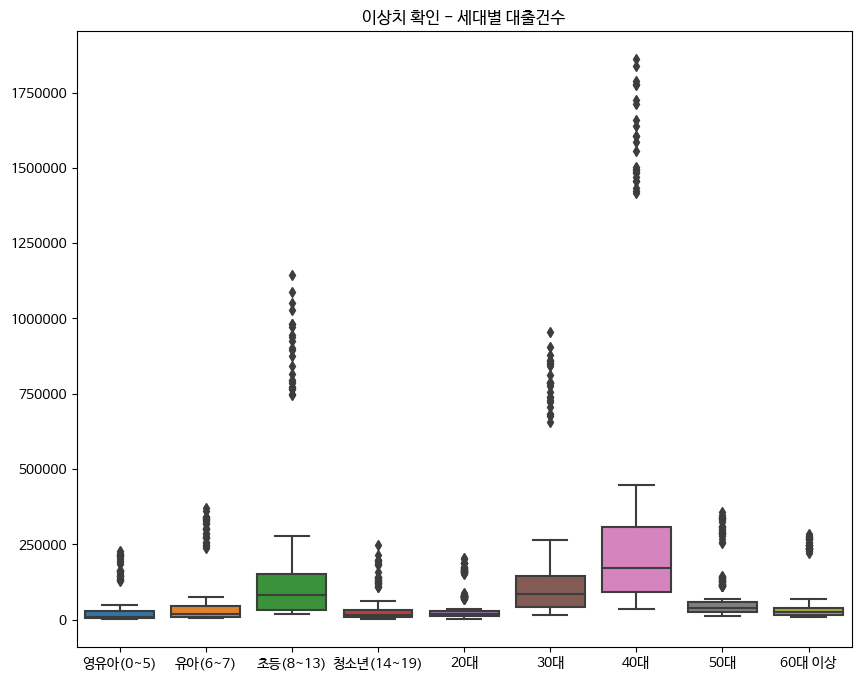

In [17]:
#상자그림 그리기
plt.figure(figsize=(10,8))
tmp = data.iloc[:,3:]


plt.ticklabel_format(style='plain', axis='y')
plt.title("이상치 확인 - 세대별 대출건수")


sns.boxplot(tmp)
plt.show()

In [ ]:
# 분야별로 평균해서 계산해보기
data1 = data.groupby(['분야']).mean()
data1 = data1.reset_index()

# 영유아~60대 열들을 연령대라는 하나의 열로 바꾸기
data1 = pd.melt(data1, id_vars=['분야'], value_vars=data1.columns[3:])
data1
data1.shape

<ipython-input-3-bd487d476ea2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = data.groupby(['분야']).mean()


(90, 3)

In [ ]:
data1.head(3)

,분야,variable,value
0,기술과학,영유아(0~5),9322.79167
1,문학,영유아(0~5),175130.83333
2,사회과학,영유아(0~5),40044.41667


In [ ]:
#data2 정의하기 - 분야별로 평균구함
data2 = data.groupby(['분야']).mean()
data2 = data2.iloc[:,2:]
data2.head(3)

<ipython-input-4-734ce23c8798>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = data.groupby(['분야']).mean()


,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
분야,,,,,,,,,
기술과학,9322.79167,14612.79167,63454.62500,21884.95833,26524.54167,97440.41667,175439.29167,57657.12500,31624.00000
문학,175130.83333,302538.12500,888507.50000,152705.62500,171669.91667,784830.25000,1593236.12500,306978.50000,251634.16667
사회과학,40044.41667,43724.66667,115985.70833,41883.91667,77536.37500,242887.50000,391310.41667,126247.25000,60393.33333


In [ ]:
# 데이터프레임 비율 구하기
# 각 열을 다 더한 것으로 나눔
rate_data2 = data2.div(data2.sum(axis=0), axis=1)
rate_data2.head(3)

,영유아(0~5),유아(6~7),초등(8~13),청소년(14~19),20대,30대,40대,50대,60대 이상
분야,,,,,,,,,
기술과학,0.03092,0.02798,0.03794,0.06821,0.06848,0.06091,0.05459,0.08057,0.06403
문학,0.58080,0.57936,0.53129,0.47593,0.44324,0.49058,0.49575,0.42898,0.50948
사회과학,0.13280,0.08373,0.06935,0.13054,0.20019,0.15182,0.12176,0.17642,0.12228


In [ ]:
rate_data2.sum(axis=0)

영유아(0~5)     1.00000
유아(6~7)      1.00000
초등(8~13)     1.00000
청소년(14~19)   1.00000
20대          1.00000
30대          1.00000
40대          1.00000
50대          1.00000
60대 이상       1.00000
dtype: float64

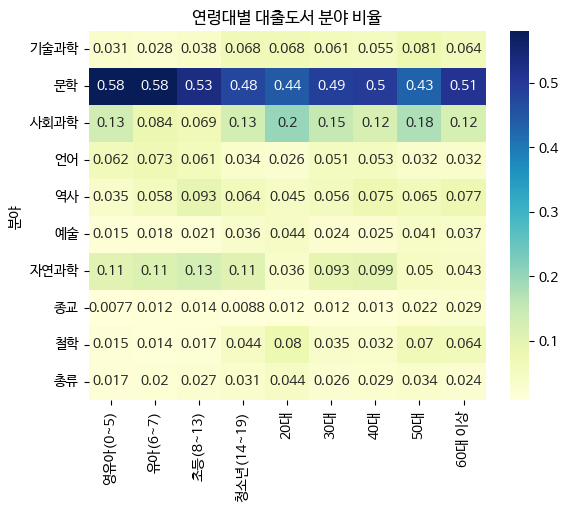

In [ ]:
#seaborn 사용해서 heatmap 그리기
import seaborn as sns

#annot=True, fmt='d' : 숫자 정수형으로 표시
#괜찮아보이는 cmap : YlGnBu / PuBu
sns.heatmap(rate_data2, annot=True, cmap = 'YlGnBu')
plt.title('연령대별 대출도서 분야 비율')
plt.show()

### 책 제목으로 워드클라우드 만들기 - 분야별, 세대별 많이 대출한 책 5권씩

In [70]:
data1 = pd.read_excel('분야별/기술과학.xlsx', sheet_name ='영유아(0~5)')
data1 = data1.iloc[:5, :][['서명', '대출건수']]

data2 = pd.read_excel('분야별/기술과학.xlsx', sheet_name ='유아(6~7)')
data2 = data2.iloc[:5, :][['서명', '대출건수']]

pd.concat([data1, data2], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,서명,대출건수
0,4~7세보다 중요한 시기는 없습니다 :아이의 정서와 인지 발달을 키우는 결정적 시기,765
1,어떻게 말해줘야 할까 :오은영의 현실밀착 육아회화,655
2,소중해 소중해 나도 너도 :3-7세 영유아와 어른들을 위한 첫 성교육 그림책,541
3,공사하는 자동차,486
4,(우리가 꼭 알아야 할) 세상 모든 중장비,470
5,(정재승의) 인간 탐구 보고서,1306
6,(정재승의) 인간 탐구 보고서,1194
7,(백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험,1080
8,(정재승의) 인간 탐구 보고서,1055
9,(백종원의) 도전 요리왕 :음식으로 맛보는 세계 역사 문화 체험,1050


In [71]:
# 데이터 가져오기 - 분야별, 세대별 많이 대출한 책 5권씩
file_name_list = ['기술과학', '문학', '사회과학', '언어', '역사', '예술', '자연과학', '종교', '철학', '총류' ]
sheet_name_list = ['영유아(0~5)', '유아(6~7)', '초등(8~13)', '청소년(14~19)', '20대', '30대', '40대', '50대', '60대 이상']



#data1 = pd.read_excel('분야별/기술과학.xlsx', sheet_name ='영유아(0~5)')
#data1.iloc[:5, :][['서명', '대출건수']]

result = ""

for file_name in file_name_list:
    for sheet_name in sheet_name_list:
        tmp_df = pd.read_excel(f'분야별/{file_name}.xlsx', sheet_name =f'{sheet_name}')
        tmp_df = tmp_df.iloc[:5, :][['서명', '대출건수']]

        if type(result) == str:
            result = tmp_df
        else:
            result = pd.concat([result, tmp_df], ignore_index=True)



result.shape

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

(450, 2)

In [59]:
result.head()

,서명,대출건수
0,4~7세보다 중요한 시기는 없습니다 :아이의 정서와 인지 발달을 키우는 결정적 시기,765
1,어떻게 말해줘야 할까 :오은영의 현실밀착 육아회화,655
2,소중해 소중해 나도 너도 :3-7세 영유아와 어른들을 위한 첫 성교육 그림책,541
3,공사하는 자동차,486
4,(우리가 꼭 알아야 할) 세상 모든 중장비,470


In [73]:
len(result) # 450

450

In [72]:
len(result.drop_duplicates(['서명']))  #188   - 중복되지 않은 책 이름, 중복되는 건 시리즈물일 것으로 추측.

188

In [74]:
result = result.groupby('서명').sum()

In [75]:
result.head(5)

,대출건수
서명,
(36개월부터 영어를 모국어처럼 습득하는) 하루 1시간 현서네 유튜브 영어 학습법,474
(걸어 다니는) 어원 사전,596
(근심 걱정이 사라지고 인생이 편안해지는) 반야심경 마음공부,2466
(김형석 교수를 만든) 백년의 독서,687
(네모아저씨의) 페이퍼 블레이드 :색종이 3장이면 멋진 팽이가 내 것!,963


In [96]:
result.sort_values('대출건수', ascending=False)

,대출건수
서명,
설민석의 한국사 대모험,162215
그리스 로마 신화,119645
흔한남매의 흔한 호기심 :일상에서 만나는 과학 상식,92794
마법천자문 :손오공의 한자 대탐험,71643
불편한 편의점 :김호연 장편소설,71426
...,...
오늘의 내 기분 :아동심리 전문가와 함께 소중한 내 감정 들여다보기,388
80일간의 퀴즈 여행,369
신사고 SSEN 쎈 고등 수학 1 + 수학 2 세트 ( 2014 고1적용 / 새교육과정 ) - 오답노트+단어장 사은품증정,358


In [89]:
dict_result = result.to_dict()
dict_result = dict_result["대출건수"]

In [93]:
key_list = dict_result.keys()

In [98]:
result.head(3)

,대출건수
서명,
(36개월부터 영어를 모국어처럼 습득하는) 하루 1시간 현서네 유튜브 영어 학습법,474
(걸어 다니는) 어원 사전,596
(근심 걱정이 사라지고 인생이 편안해지는) 반야심경 마음공부,2466


In [110]:
print(result.iloc[0])
print("================================")
result.iloc[0]['대출건수']

대출건수    474
Name: (36개월부터 영어를 모국어처럼 습득하는) 하루 1시간 현서네 유튜브 영어 학습법 , dtype: int64


474

In [111]:
tmp = result.index[0]

In [112]:
tmp

'(36개월부터 영어를 모국어처럼 습득하는) 하루 1시간 현서네 유튜브 영어 학습법 '

In [114]:
# 중괄호() 제거하기  - 정규표현식
import re

round = re.search('\(|\)', tmp)
if round:
    round = round.group()
    text = re.sub('\(|\)', '', tmp)

print(text)

36개월부터 영어를 모국어처럼 습득하는 하루 1시간 현서네 유튜브 영어 학습법 


In [115]:
text.split()

['36개월부터', '영어를', '모국어처럼', '습득하는', '하루', '1시간', '현서네', '유튜브', '영어', '학습법']

In [170]:
import numpy as np
img = Image.open("book2.jpg")  #흰색에 가까울수록 255, 0에 가까울수록 검은색
img = np.array(img)  #이미지를 행렬로 바꾸기

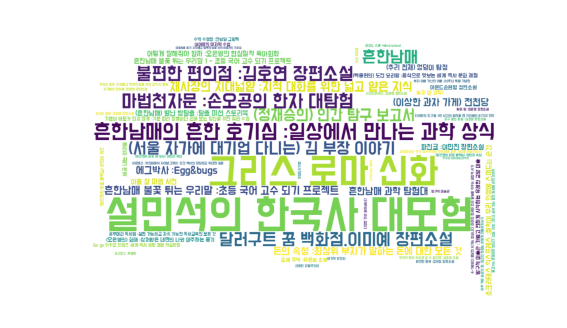

In [171]:
# 많이 대출한 도서 이름 워드클라우드로 표현하기
from wordcloud import WordCloud
# 이미지 데이터 불러오고, 처리하는 라이브러리
from PIL import Image

#contour_color = 'black'
#contour_width = 5

wc = WordCloud(font_path="BMDOHYEON_ttf.ttf" ,
               background_color = 'white', mask=img)
 #              ,contour_color = contour_color, contour_width = contour_width)

#워드클라우드 사이즈 변경하기
plt.figure(figsize = (10,4))

plt.axis("off")
cloud = wc.generate_from_frequencies(dict_result)
plt.imshow(cloud)  #워드클라우드 보여주기